  - Now, it's your turn to design your first regression model. In this module, you'll be using a version of the "House Prices" dataset from Kaggle. This dataset consists of 79 variables describing many aspects of residential homes in Ames, Iowa. Using this data, your task will be to predict the prices of the houses. You can find the descriptions of the variables here: House Prices . 
To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
df = pd.read_csv("train.csv", sep = ",", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**(1)** Investigate the data and do any necessary data cleaning.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df_null = (df.isna().sum() * 100 / (len(df))).sort_values(ascending=False)
df_null.head(10)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
dtype: float64

In [5]:
df.drop(df_null[:5].index, axis=1, inplace=True)

In [6]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [7]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes != "O"]

In [8]:
df.loc[:,num_but_cat]

,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,YrSold
Id,,,,,,,,,,,
1,5,1,0,2,1,3,1,0,2,0,2008
2,8,0,1,2,0,3,1,1,2,0,2007
3,5,1,0,2,1,3,1,1,2,0,2008
4,5,1,0,1,0,3,1,1,3,0,2006
5,5,1,0,2,1,4,1,1,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...
1456,5,0,0,2,1,3,1,1,2,0,2007
1457,6,1,0,2,0,3,1,2,2,0,2010
1458,9,0,0,2,0,4,1,2,1,0,2010


In [9]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes == "O"]

In [10]:
df.loc[:,cat_but_car]

,Neighborhood
Id,
1,CollgCr
2,Veenker
3,CollgCr
4,Crawfor
5,NoRidge
...,...
1456,Gilbert
1457,NWAmes
1458,Crawfor


In [11]:
cat_cols = cat_cols + num_but_cat

In [12]:
cat_cols = [col for col in cat_cols if col not in cat_but_car]

In [13]:
cat_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'YrSold']

In [14]:
df.loc[:, cat_cols]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,1,0,2,1,3,1,0,2,0,2008
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,0,1,2,0,3,1,1,2,0,2007
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,1,0,2,1,3,1,1,2,0,2008
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,1,0,1,0,3,1,1,3,0,2006
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,...,1,0,2,1,4,1,1,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,2,1,3,1,1,2,0,2007
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,1,0,2,0,3,1,2,2,0,2010
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,0,0,2,0,4,1,2,1,0,2010


In [15]:
df[cat_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
OverallCond       9
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
Fireplaces        4
GarageCars        5
PoolArea          8
YrSold            5
dtype: int64

In [16]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [17]:
num_cols = [col for col in num_cols if col not in num_but_cat]

In [18]:
num_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [19]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


In [20]:
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f'cat_cols: {len(cat_cols)}')
print(f'num_cols: {len(num_cols)}')
print(f'cat_but_car: {len(cat_but_car)}')
print(f'num_but_cat: {len(num_but_cat)}')

Observations: 1460
Variables: 75
cat_cols: 48
num_cols: 26
cat_but_car: 1
num_but_cat: 11


**(2)** Explore the data and find some variables that you think would be useful in the prediction of the house prices.

In [21]:
df[['SalePrice']].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


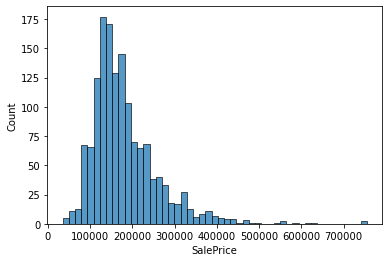

In [22]:
sns.histplot(df['SalePrice']);

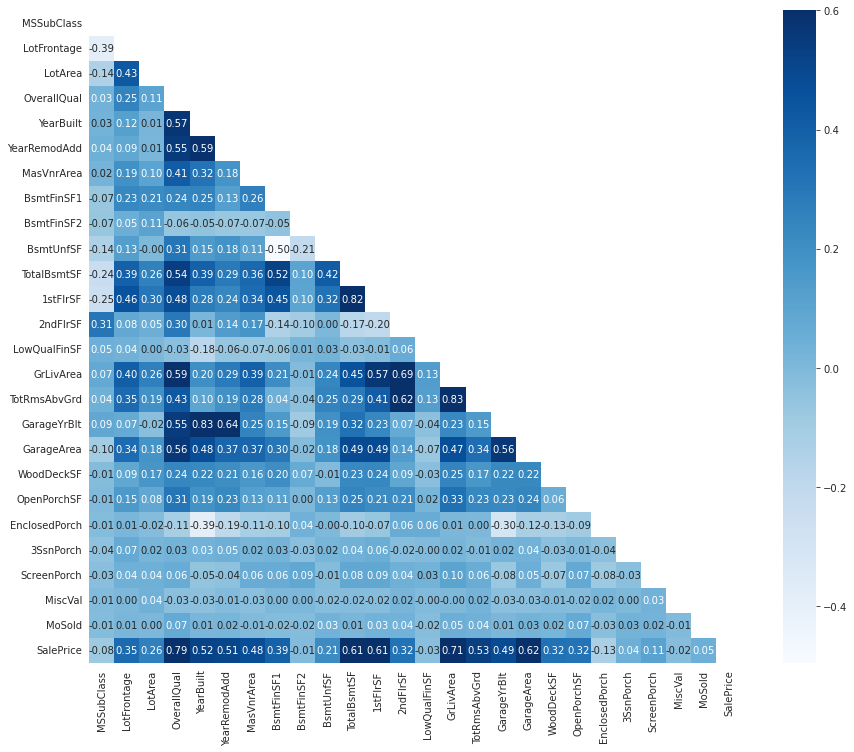

In [23]:
corr = df[num_cols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.6, annot=True, fmt='.2f', square=True, cmap='Blues')

 - 'OverallQual', 'GrLivArea' ,'GarageArea', '1stFlrSF'and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
 - '1stFlrSF' and 'TotalBsmtSF' have correlation with each other. 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

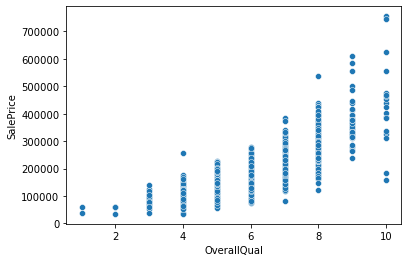

In [24]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)

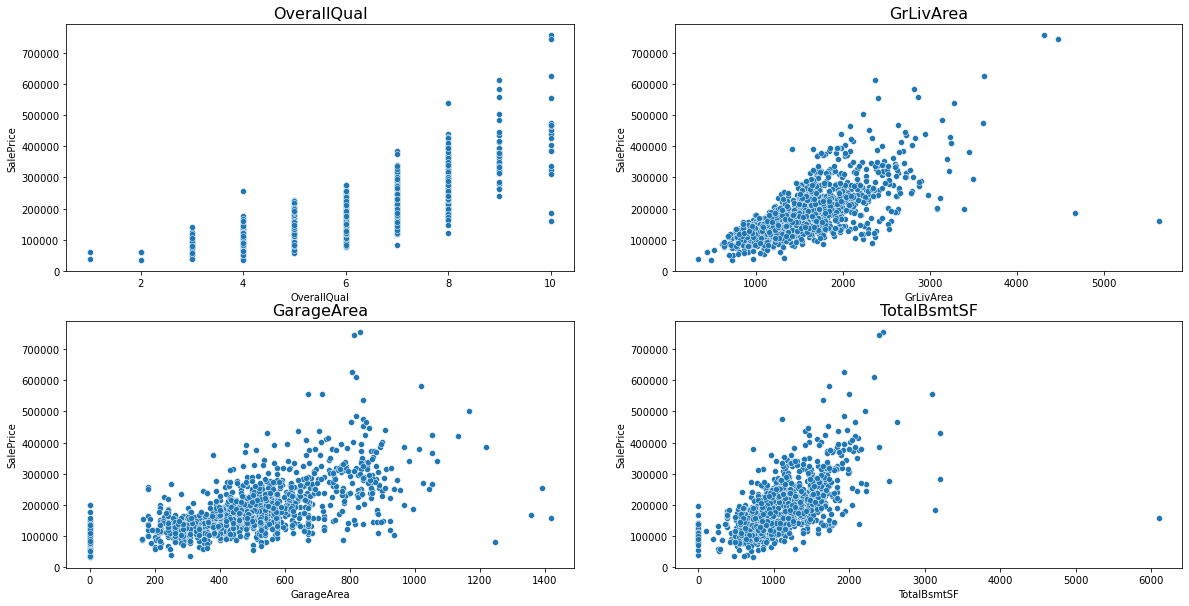

In [25]:
cols_num = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols_num): 
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y='SalePrice', data=df)
    plt.title(col, fontsize=16)
plt.show()


In [26]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Value_Counts": dataframe[categorical_col].value_counts()}), end="\n\n\n")

In [27]:
for col in cat_cols:
    print(col)
    target_summary_with_cat(df, "SalePrice", col)
    print('=' * 50)

MSZoning
           TARGET_MEAN  Value_Counts
C (all)   74528.000000            10
FV       214014.061538            65
RH       131558.375000            16
RL       191004.994787          1151
RM       126316.830275           218


Street
        TARGET_MEAN  Value_Counts
Grvl  130190.500000             6
Pave  181130.538514          1454


LotShape
       TARGET_MEAN  Value_Counts
IR1  206101.665289           484
IR2  239833.365854            41
IR3  216036.500000            10
Reg  164754.818378           925


LandContour
       TARGET_MEAN  Value_Counts
Bnk  143104.079365            63
HLS  231533.940000            50
Low  203661.111111            36
Lvl  180183.746758          1311


Utilities
         TARGET_MEAN  Value_Counts
AllPub  180950.95682          1459
NoSeWa  137500.00000             1


LotConfig
           TARGET_MEAN  Value_Counts
Corner   181623.425856           263
CulDSac  223854.617021            94
FR2      177934.574468            47
FR3      208475.000000    

I think these variables have an effect on the selling price :
**HouseStyle,SaleType,GarageQual,GarageFinish,KitchenQual,HeatingQC,BsmtQual,ExterQual,Fireplaces**

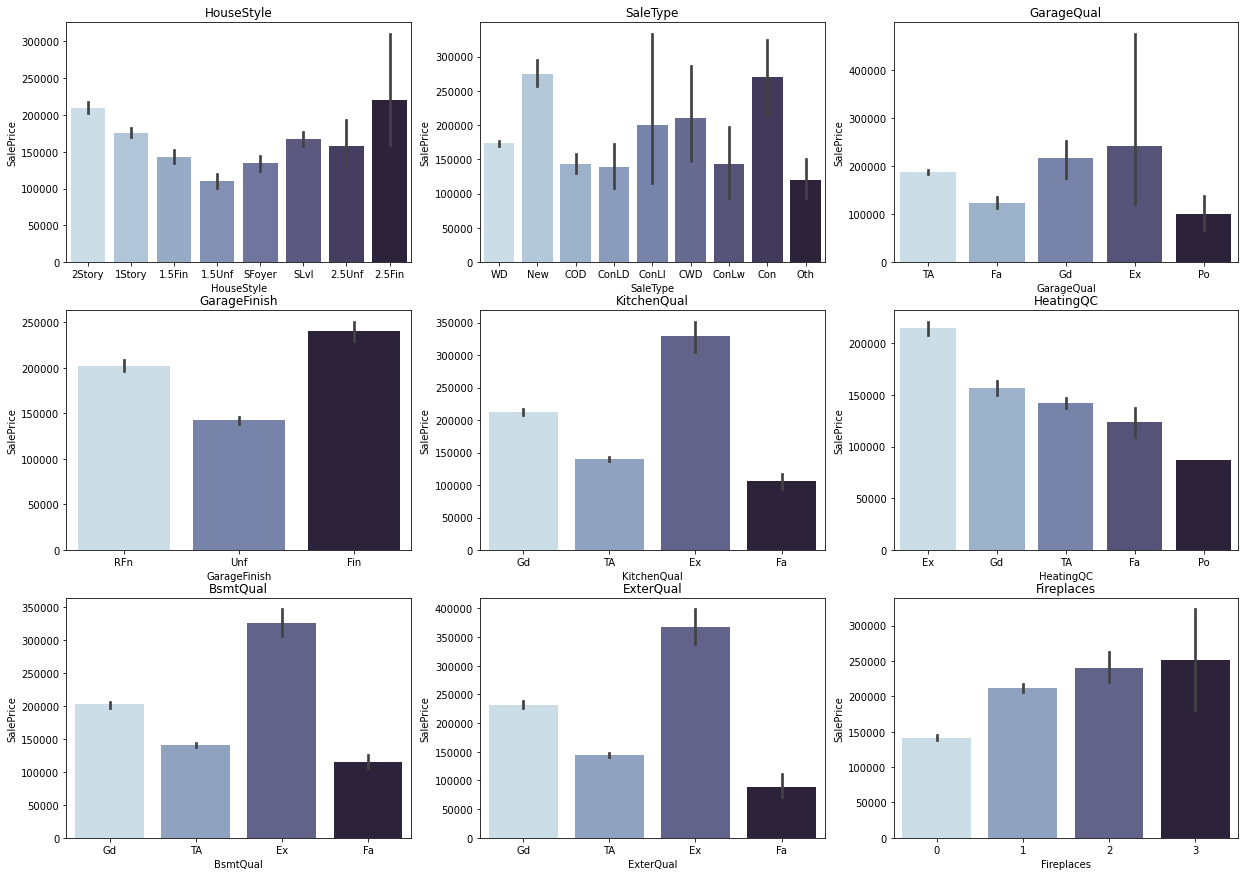

In [28]:
cols_cat = ['HouseStyle', 'SaleType', 'GarageQual', 'GarageFinish', 'KitchenQual', 'HeatingQC', 'BsmtQual', 'ExterQual', 'Fireplaces']
plt.figure(figsize=(21,15))
for i, col in enumerate(cols_cat): 
    plt.subplot(3, 3, i+1)
    sns.barplot(x=col, y='SalePrice', data=df, palette="ch:s=.25,rot=-.25")
    plt.title(col)
plt.show()

In [29]:
df['Fireplaces'] = df['Fireplaces'].astype(str)

In [30]:
cols = cols_num + cols_cat + ['SalePrice']
df = df.loc[:, cols]

In [31]:
df

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,HouseStyle,SaleType,GarageQual,GarageFinish,KitchenQual,HeatingQC,BsmtQual,ExterQual,Fireplaces,SalePrice
Id,,,,,,,,,,,,,,
1,7,1710,548,856,2Story,WD,TA,RFn,Gd,Ex,Gd,Gd,0,208500
2,6,1262,460,1262,1Story,WD,TA,RFn,TA,Ex,Gd,TA,1,181500
3,7,1786,608,920,2Story,WD,TA,RFn,Gd,Ex,Gd,Gd,1,223500
4,7,1717,642,756,2Story,WD,TA,Unf,Gd,Gd,TA,TA,1,140000
5,8,2198,836,1145,2Story,WD,TA,RFn,Gd,Ex,Gd,Gd,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,1647,460,953,2Story,WD,TA,RFn,TA,Ex,Gd,TA,1,175000
1457,6,2073,500,1542,1Story,WD,TA,Unf,TA,TA,Gd,TA,2,210000
1458,7,2340,252,1152,2Story,WD,TA,RFn,Gd,Ex,TA,Ex,2,266500


In [32]:
df = pd.get_dummies(df, columns=cols_cat,
                    drop_first=True)

In [33]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df[cols_num] = rs.fit_transform(df[cols_num])

In [34]:
df

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,...,HeatingQC_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3
Id,,,,,,,,,,,,,,,,,,,,,
1,0.5,0.380070,0.281573,-0.269652,208500,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0.0,-0.312090,-0.082816,0.538308,181500,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,0.5,0.497489,0.530021,-0.142289,223500,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4,0.5,0.390885,0.670807,-0.468657,140000,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
5,1.0,1.134029,1.474120,0.305473,250000,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0.0,0.282735,-0.082816,-0.076617,175000,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1457,0.0,0.940904,0.082816,1.095522,210000,0,1,0,0,0,...,1,0,1,0,0,0,1,0,1,0
1458,0.5,1.353418,-0.944099,0.319403,266500,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,SalePrice,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,...,HeatingQC_TA,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3
Id,,,,,,,,,,,,,,,,,,,,,
1,0.5,0.380070,0.281573,-0.269652,208500,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0.0,-0.312090,-0.082816,0.538308,181500,0,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,0.5,0.497489,0.530021,-0.142289,223500,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
4,0.5,0.390885,0.670807,-0.468657,140000,0,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
5,1.0,1.134029,1.474120,0.305473,250000,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


**(3)** Build your initial model using these features and estimate the parameters using OLS

In [36]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

In [37]:
# Using Scikit-Learn

lrm = linear_model.LinearRegression()
lrm.fit(X, y)

LinearRegression()

In [38]:
print('Coefficients: {}\n'.format(lrm.coef_))
print('Intercept: {}'.format(lrm.intercept_))

Coefficients: [ 28471.02369984  32707.06072829   9797.52672242   9608.2660652
   7089.86914028  11891.00702759 -25208.14570959 -24228.01454384
   3872.93893449  14117.45861255  14580.19383948  12116.61971758
  52207.37295023  -3313.85390737  13683.40523238  17838.48127291
  19531.7613616   25321.69287237  10992.25947862  -5419.18468778
  13375.06805659 -17297.06238588   3486.91852514  -5763.15840203
  -8806.24621861 -39525.61663606 -30332.79731656 -37289.27456574
  -7082.54371653  -3104.90263754 -11814.60203741  -6937.56970041
 -29614.48396513 -20270.98836289 -24117.31843506 -32728.2431845
 -19370.20404244 -27794.4017003    6381.34259443  28979.8947207
 -85960.33085824]

Intercept: 232949.85621801886


In [39]:
# Using statsmodel

import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     157.3
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:15:02   Log-Likelihood:                -17293.
No. Observations:                1460   AIC:                         3.467e+04
Df Residuals:                    1418   BIC:                         3.489e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.329e+05   1.01e+04     23.129      0.000    2.13e+05    2.53e+05
OverallQual        2.847e+04   2438.704     11.675      0.000    2.37e+04    3.33e+04
GrLivArea          3.271e+04   2243.212     14.580      0.000    2.83e+04    3.71e+04
GarageArea         9797.5267   1599.392      6.126      0.000    6660.098    1.29e+04
TotalBsmtSF        9608.2661   1881.799      5.106      0.000    5916.856    1.33e+04
HouseStyle_1.5Unf  7089.8691   1.03e+04      0.687      0.492   -1.32e+04    2.73e+04
HouseStyle_1Story  1.189e+04   3762.849      3.160      0.002    4509.658    1.93e+04
HouseStyle_2.5Fin -2.521e+04   1.32e+04     -1.911      0.056   -5.11e+04     663.819
HouseStyle_2.5Unf -2.423e+04    1.1e+04     -2.200      0.028   -4.58e+04   -2627.109
HouseStyle_2Story  3872.9389   3568.352      1.085      0.278   -3126.877    1.09e+04
HouseStyle_SFoyer  1.412e+04   6908.079      2.044      0.041     566.306    2.77e+04
HouseStyle_SLvl    1.458e+04   5350.902      2.725      0.007    4083.659    2.51e+04
SaleType_CWD       1.212e+04   1.81e+04      0.669      0.504   -2.34e+04    4.76e+04
SaleType_Con       5.221e+04    2.5e+04      2.092      0.037    3253.577    1.01e+05
SaleType_ConLD    -3313.8539   1.28e+04     -0.258      0.797   -2.85e+04    2.19e+04
SaleType_ConLI     1.368e+04   1.63e+04      0.839      0.401   -1.83e+04    4.57e+04
SaleType_ConLw     1.784e+04   1.65e+04      1.078      0.281   -1.46e+04    5.03e+04
SaleType_New       1.953e+04   6508.169      3.001      0.003    6765.087    3.23e+04
SaleType_Oth       2.532e+04   2.07e+04      1.222      0.222   -1.53e+04     6.6e+04
SaleType_WD        1.099e+04   5417.030      2.029      0.043     366.006    2.16e+04
GarageQual_Fa     -5419.1847   7226.730     -0.750      0.453   -1.96e+04    8757.046
GarageQual_Gd      1.338e+04   1.09e+04      1.231      0.219   -7944.353    3.47e+04
GarageQual_Po      -1.73e+04   2.11e+04     -0.820      0.412   -5.87e+04    2.41e+04
GarageQual_TA      3486.9185   5413.910      0.644      0.520   -7133.214    1.41e+04
GarageFinish_RFn  -5763.1584   2594.249     -2.222      0.026   -1.09e+04    -674.179
GarageFinish_Unf  -8806.2462   2934.934     -3.000      0.003   -1.46e+04   -3048.967
KitchenQual_Fa    -3.953e+04   7991.531     -4.946      0.000   -5.52e+04   -2.38e+04
KitchenQual_Gd    -3.033e+04   4752.743     -6.382      0.000   -3.97e+04    -2.1e+04
KitchenQual_TA    -3.729e+04   5236.254     -7.121      0.000   -4.76e+04    -2.7e+04
HeatingQC_Fa      -7082.5437   5433.372     -1.304      0.193   -1.77e+04    3575.767
HeatingQC_Gd      -3104.9026   2783.279     -1.116      0.265   -8564.690    2354.884
HeatingQC_Po      -1.181e+04   3.56e+04     -0.332      0.740   -8.17e+04    5.81e+04
HeatingQC_TA      -6937.5697   2590.369     -2.678      0.007    -1.2e+04

 ### We can say that columns with p value less than 0.05 have a significant effect on the target variable. 

In [41]:
df.to_csv(r'house_df.csv')